# Predicting the 2022 FIFA World Cup Winner.
In this Jupyter Notebook, I'm going to develop a Machine Learning model to try to predict the outcomes of all games in World Cup 2022, which also means predicting the winner of the championship.

### step 1): Importing libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


### step 2) : Initial Data Preparation

In [2]:
#load data 
results = pd.read_csv('results.csv')
ranking= pd.read_csv('rank.csv')

>results datasets--->  all the matches from (1872-11-30) to 
(2022-09-30).


> ranking -----> Men's Ranking - FIFA 

In [3]:
ranking

,RK,Team,Points
0,1,Brazil,1837.56
1,2,Belgium,1821.92
2,3,Argentina,1770.65
3,4,France,1764.85
4,5,England,1737.46
...,...,...,...
206,207,Sri Lanka,825.25
207,208,US Virgin Islands,823.97
208,209,British Virgin Islands,809.32
209,210,Anguilla,790.74


**Brazil currently holds the highest FIFA rank, followed by Belgium,Argentina, France, and England. 1 Point for Brazil!**

In [4]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44055,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False
44058,2022-09-27,Greece,Northern Ireland,3,1,UEFA Nations League,Athens,Greece,False


In [5]:
ranking.shape , results.shape

((211, 3), (44060, 9))

In [6]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RK       211 non-null    int64  
 1   Team     211 non-null    object 
 2   Points   211 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44060 non-null  object
 1   home_team   44060 non-null  object
 2   away_team   44060 non-null  object
 3   home_score  44060 non-null  int64 
 4   away_score  44060 non-null  int64 
 5   tournament  44060 non-null  object
 6   city        44060 non-null  object
 7   country     44060 non-null  object
 8   neutral     44060 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [8]:
results.describe()

,home_score,away_score
count,44060.000000,44060.000000
mean,1.740513,1.178325
std,1.747505,1.394805
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [9]:
#Finding outmissing values

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

- No  missing values

([<matplotlib.axis.XTick at 0x2db1c25e580>,
 [Text(1, 0, 'Home Score'), Text(2, 0, 'Away Score')])

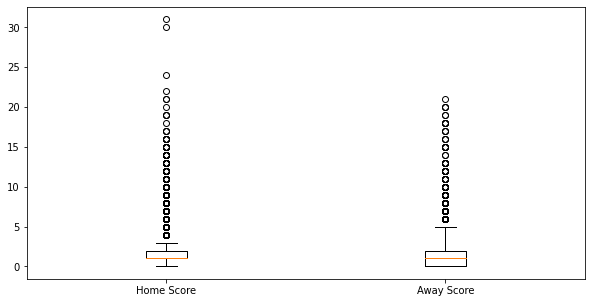

In [10]:
#finding outliers in the numerical data columns

fig = plt.figure(figsize =(10, 5))
plt.boxplot([results["home_score"],results["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

In [11]:
#Boxplot says there are many outliers
#Let's remove those outlier,It will make our Machine Learning model more accurate
#Asume maximum goals that one team can score is 15

results=results[(results["home_score"]<15) & (results["away_score"]<15)]
results.head(5)
#Dataset after removing outliers

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [12]:
results.shape

(44009, 9)

In [13]:
#Adding goal difference and establishing who is the winner 
conditions  = [results["home_score"] ==results["away_score"], results["home_score"] > results["away_score"] , results["home_score"] < results["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
results["Win_Statues"] = np.select(conditions, choices)

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win,3
...,...,...,...,...,...,...,...,...,...,...,...
44055,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,Lost,2
44056,2022-09-27,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False,Draw,0
44057,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,Win,4
44058,2022-09-27,Greece,Northern Ireland,3,1,UEFA Nations League,Athens,Greece,False,Win,2


### What are the most tournament played ?

Text(0.5, 1.0, 'TOP 10 TYPE OF MATCH TOURNAMENTS')

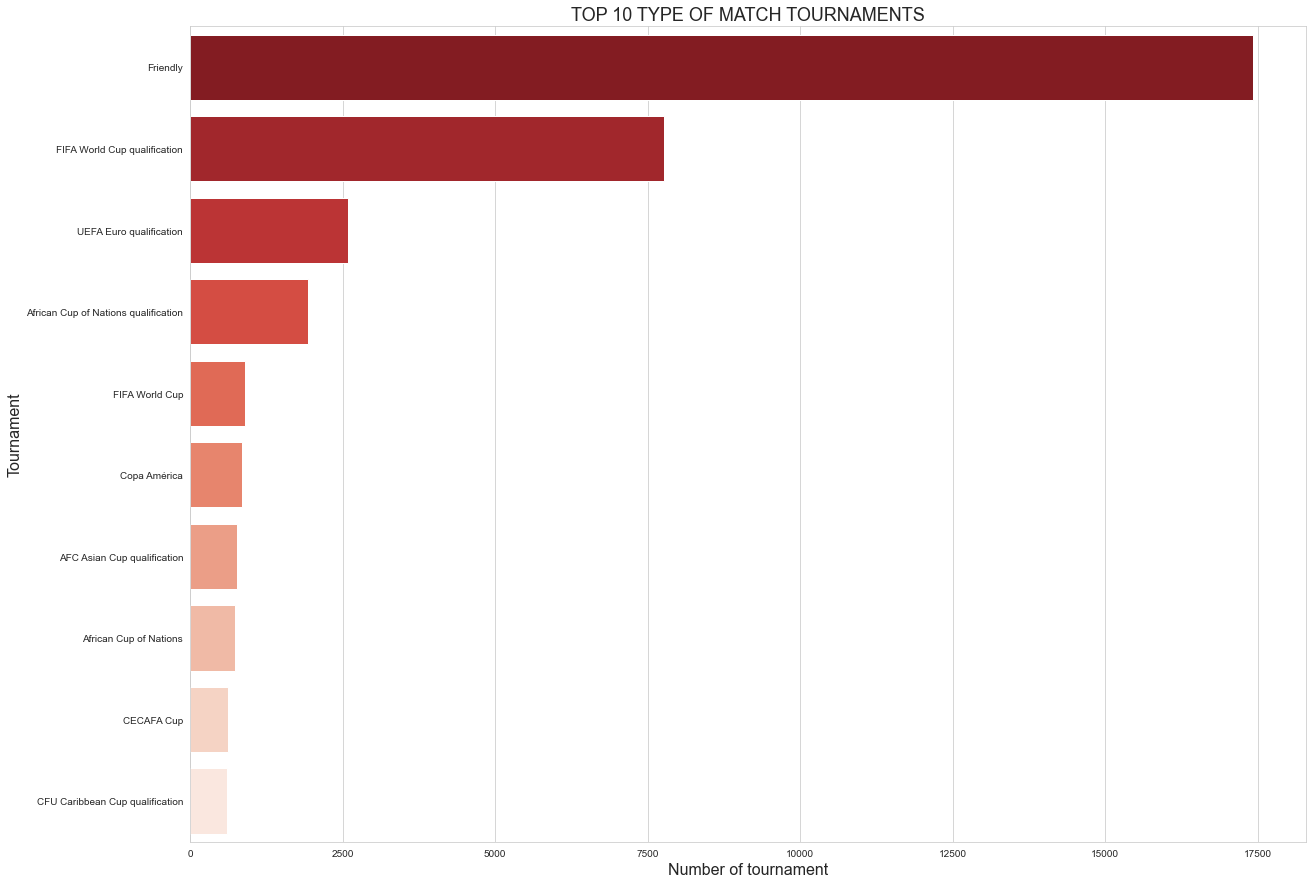

In [14]:
tournament = results['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (20,15))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)

### countries played most Matches

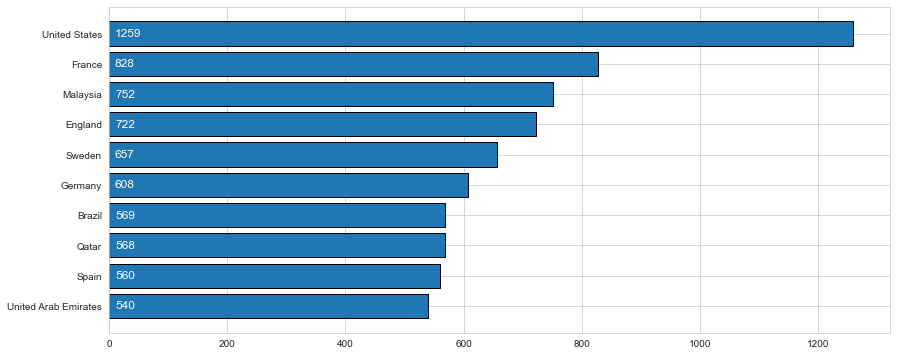

In [15]:
rank_bound = 10
countries=results.home_team.unique()
ax = results.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

###  Finding out the impact hosting a major tournament helps a country's chances in winning matches?

In [16]:
#Now take the rpws that home_team==Country 
#Nad romove the data of friendly matches

data_home=results.loc[results["home_team"]==results["country"] ]
data_home=results.loc[results["tournament"] != "Friendly"]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues,goal_difference
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Ireland,False,Lost,5
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,Win,6
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Ireland,False,Lost,7
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,Win,1
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,Lost,4


In [17]:
#How home team performs in tournament matches

tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="brown",subset=["Draw","Lost","Win","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,5789,7575,13225,26589
FIFA World Cup qualification,1644,2137,3987,7768
UEFA Euro qualification,510,818,1265,2593
African Cup of Nations qualification,472,379,1081,1932
FIFA World Cup,199,290,411,900
Copa América,181,230,430,841
AFC Asian Cup qualification,126,188,447,761
African Cup of Nations,209,200,333,742
CECAFA Cup,147,185,288,620


Text(0.5, 1.0, 'Home Team Winning Status')

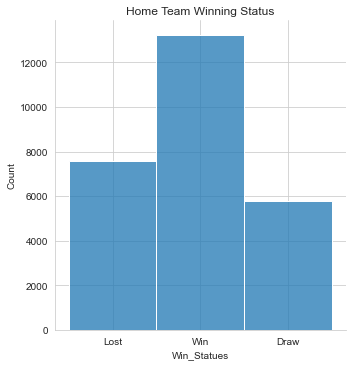

In [18]:
#Home team results
sns.displot(data_home, x="Win_Statues")
plt.title("Home Team Winning Status")

In [19]:
data_home['Win_Statues'].value_counts()

Win     13225
Lost     7575
Draw     5789
Name: Win_Statues, dtype: int64

### Results of historical matches since the beginning of the championship (1930) for all participating teams.

In [20]:
#creating a column for year but from the first world cup that held in 1930
year = []
for row in results['date']:
    year.append(int(row[:4]))
results ['match_year']= year
results_1930 = results[results.match_year >= 1930]
results_1930.count()

date               42747
home_team          42747
away_team          42747
home_score         42747
away_score         42747
tournament         42747
city               42747
country            42747
neutral            42747
Win_Statues        42747
goal_difference    42747
match_year         42747
dtype: int64

In [21]:
results_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues,goal_difference,match_year
1263,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Win,1,1930
1264,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Win,1,1930
1265,1930-01-26,Greece,Yugoslavia,2,1,Balkan Cup,Athens,Greece,False,Win,1,1930
1266,1930-02-01,Northern Ireland,Wales,7,0,British Championship,Belfast,Northern Ireland,False,Win,7,1930
1267,1930-02-09,Italy,Switzerland,4,2,Friendly,Rome,Italy,False,Win,2,1930


In [22]:
# Create a DF with all participating teams
worldcup_teams = ['Qatar','Ecuador','Senegal','Netherlands', 
            'England','Iran','United States','Wales', 
            'Argentina','Saudi Arabia','Mexico','Poland', 
            'Denmark','Tunisia','France','Australia', 
            'Germany','Japan','Spain','Costa Rica', 
            'Morocco','Croatia','Belgium','Canada', 
            'Switzerland','Cameroon','Brazil','Serbia', 
            'Uruguay','South Korea','Portugal','Ghana']

# Filter the 'results' dataframe to show only teams in this years' world cup, from 1930 onwards
df_teams_home = results_1930[results_1930['home_team'].isin(worldcup_teams)]
df_teams_away = results_1930[results_1930['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               21555
home_team          21555
away_team          21555
home_score         21555
away_score         21555
tournament         21555
city               21555
country            21555
neutral            21555
Win_Statues        21555
goal_difference    21555
match_year         21555
dtype: int64

In [23]:
df_teams

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues,goal_difference,match_year
1263,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Win,1,1930
1264,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Win,1,1930
1270,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,Win,2,1930
1271,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Lost,2,1930
1273,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,Draw,0,1930
...,...,...,...,...,...,...,...,...,...,...,...,...
44036,2022-09-27,South Korea,Cameroon,1,0,Friendly,Seoul,South Korea,False,Win,1,2022
44043,2022-09-27,Paraguay,Morocco,0,0,Friendly,Sevilla,Spain,True,Draw,0,2022
44046,2022-09-27,Saudi Arabia,United States,0,0,Friendly,Murcia,Spain,True,Draw,0,2022
44050,2022-09-27,Portugal,Spain,0,1,UEFA Nations League,Braga,Portugal,False,Lost,1,2022


In [24]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year','neutral'], axis=1)
df_teams_1930.head()

,home_team,away_team,Win_Statues
1263,Spain,Czechoslovakia,Win
1264,Portugal,Czechoslovakia,Win
1270,Portugal,France,Win
1271,Germany,Italy,Lost
1273,France,Switzerland,Draw


# Building the model

In [25]:
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a draw, and "0" if the home team has lost.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.Win_Statues =="Win",'winning_team']=2
df_teams_1930.loc[df_teams_1930.Win_Statues == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.Win_Statues == "Lost", 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,Win_Statues,winning_team
0,Spain,Czechoslovakia,Win,2.0
1,Portugal,Czechoslovakia,Win,2.0
2,Portugal,France,Win,2.0
3,Germany,Italy,Lost,0.0
4,France,Switzerland,Draw,1.0


In [26]:
df_teams_1930 = df_teams_1930.drop("Win_Statues",axis=1)
df_teams_1930.head()

,home_team,away_team,winning_team
0,Spain,Czechoslovakia,2.0
1,Portugal,Czechoslovakia,2.0
2,Portugal,France,2.0
3,Germany,Italy,0.0
4,France,Switzerland,1.0


<AxesSubplot:xlabel='winning_team', ylabel='count'>

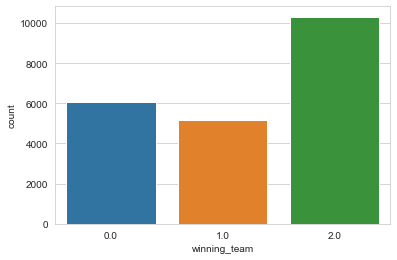

In [27]:
sns.countplot(x='winning_team', data=df_teams_1930)

**a bigger amount of wins for teams playing at home.**

- but in the world cup, there is not a home & away team so we will fix that later.

In [28]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [29]:
final.head()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Best Model 

In [30]:
# Separate train and test sets

from sklearn.model_selection import train_test_split


# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
print('X_train shape is ' , X_train.shape)
print('x_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (15088, 428)
x_test shape is  (6467, 428)
y_train shape is  (15088,)
y_test shape is  (6467,)


In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.574
Test set accuracy:  0.564


In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)
score = randomforest.score(X_train, y_train)
score2 = randomforest.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.670
Test set accuracy:  0.544


In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
score = decisiontree.score(X_train, y_train)
score2 = decisiontree.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.670
Test set accuracy:  0.533


In [35]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.score(X_train, y_train)
score2 = knn.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.598
Test set accuracy:  0.491


In [36]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
score = sgd.score(X_train, y_train)
score2 = sgd.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.568
Test set accuracy:  0.559


In [37]:
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.5616205350239678

**Logistic Regression is best model with test data**

## Creating the prediction set with 2022 FIFA World Cup data

In [46]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets 
wc_matches = pd.read_csv('matches.csv')

# List for storing the group stage games
pred_set = []

In [47]:
# Create new columns with ranking position of each team
wc_matches.insert(1, 'first_position', wc_matches['Home'].map(ranking.set_index('Team')['RK']))
wc_matches.insert(2, 'second_position', wc_matches['Away'].map(ranking.set_index('Team')['RK']))

# We only need the group stage games, so we have to slice the dataset
wc_matches = wc_matches.iloc[:48, :]
wc_matches.head()

,Round,first_position,second_position,Group,Date,Home,Away,Time (ET),Staduim
0,1,48.0,44.0,A,"Mon, Nov. 20",Qatar,Ecuador,6 p.m.,Al Bayt Stadium
1,1,18.0,8.0,A,"Mon, Nov. 21",Senegal,Netherlands,6 p.m.,Al Thumama Stadium
2,1,5.0,22.0,B,"Mon, Nov. 21",England,IR Iran,3 p.m.,Khalifa Int'l Stadium
3,1,14.0,19.0,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
4,1,3.0,53.0,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium


In [48]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in wc_matches.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home'], 'away_team': row['Away'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away'], 'away_team': row['Home'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head(16)

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,Netherlands,Senegal,None
2,England,IR Iran,None
3,USA,Wales,None
4,Argentina,Saudi Arabia,None
5,Mexico,Poland,None
6,Denmark,Tunisia,None
7,France,Australia,None
8,Germany,Japan,None
9,Spain,Costa Rica,None


In [49]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
wc_matches

,Round,first_position,second_position,Group,Date,Home,Away,Time (ET),Staduim
0,1,48.0,44.0,A,"Mon, Nov. 20",Qatar,Ecuador,6 p.m.,Al Bayt Stadium
1,1,18.0,8.0,A,"Mon, Nov. 21",Senegal,Netherlands,6 p.m.,Al Thumama Stadium
2,1,5.0,22.0,B,"Mon, Nov. 21",England,IR Iran,3 p.m.,Khalifa Int'l Stadium
3,1,14.0,19.0,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
4,1,3.0,53.0,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
5,1,12.0,26.0,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974
6,1,10.0,30.0,D,"Tue, Nov. 22",Denmark,Tunisia,8 a.m.,Education City Stadium
7,1,4.0,39.0,D,"Tue, Nov. 22",France,Australia,2 p.m.,Al Janoub Stadium
8,1,11.0,24.0,E,"Wed, Nov. 23",Germany,Japan,8 a.m.,Khalifa Int'l
9,1,6.0,34.0,E,"Wed, Nov. 23",Spain,Costa Rica,11 a.m.,Al Thumama


In [51]:
#group matches  
predictions = logreg.predict(pred_set)
for i in range(wc_matches.shape[0]):
    print(backup_pred_set.iloc[i, 0] + " and " + backup_pred_set.iloc[i, 1])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")


Ecuador and Qatar
Winner: Ecuador
Probability of Ecuador winning:  0.628
Probability of Draw:  0.210
Probability of Qatar winning:  0.162

Netherlands and Senegal
Winner: Netherlands
Probability of Netherlands winning:  0.622
Probability of Draw:  0.269
Probability of Senegal winning:  0.109

England and IR Iran
Winner: England
Probability of England winning:  0.869
Probability of Draw:  0.096
Probability of IR Iran winning:  0.035

USA and Wales
Winner: Wales
Probability of USA winning:  0.323
Probability of Draw:  0.213
Probability of Wales winning:  0.463

Argentina and Saudi Arabia
Winner: Argentina
Probability of Argentina winning:  0.819
Probability of Draw:  0.138
Probability of Saudi Arabia winning:  0.044

Mexico and Poland
Winner: Mexico
Probability of Mexico winning:  0.425
Probability of Draw:  0.294
Probability of Poland winning:  0.281

Denmark and Tunisia
Winner: Denmark
Probability of Denmark winning:  0.599
Probability of Draw:  0.258
Probability of Tunisia winning:  0

In [52]:
# List of tuples before 
group_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('France', 'Mexico'),
            ('England', 'Senegal'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Belgium', 'Germany'),
            ('Portugal', 'Switzerland')]

In [53]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'RK'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'RK'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [54]:
clean_and_predict(group_16, ranking, final, logreg)

Wales and Netherlands
Winner: Netherlands
Probability of Netherlands winning:  0.656
Probability of Draw:  0.209
Probability of Wales winning:  0.135

Denmark and Argentina
Winner: Argentina
Probability of Argentina winning:  0.753
Probability of Draw:  0.146
Probability of Denmark winning:  0.101

Mexico and France
Winner: France
Probability of France winning:  0.584
Probability of Draw:  0.227
Probability of Mexico winning:  0.189

Senegal and England
Winner: England
Probability of England winning:  0.726
Probability of Draw:  0.205
Probability of Senegal winning:  0.069

Croatia and Spain
Winner: Spain
Probability of Spain winning:  0.566
Probability of Draw:  0.238
Probability of Croatia winning:  0.196

Uruguay and Brazil
Winner: Brazil
Probability of Brazil winning:  0.729
Probability of Draw:  0.164
Probability of Uruguay winning:  0.107

Germany and Belgium
Winner: Germany
Probability of Belgium winning:  0.301
Probability of Draw:  0.197
Probability of Germany winning:  0.502


In [55]:
# List of matches
quarters = [('Spain', 'Brazil'),
            ('Netherlands', 'Argentina'),
            ('Germany', 'Portugal'),
            ('England', 'France')]

In [56]:
clean_and_predict(quarters, ranking, final, logreg)

Spain and Brazil
Winner: Brazil
Probability of Brazil winning:  0.526
Probability of Draw:  0.290
Probability of Spain winning:  0.185

Netherlands and Argentina
Winner: Argentina
Probability of Argentina winning:  0.573
Probability of Draw:  0.220
Probability of Netherlands winning:  0.207

Germany and Portugal
Winner: Germany
Probability of Portugal winning:  0.331
Probability of Draw:  0.317
Probability of Germany winning:  0.352

England and France
Winner: France
Probability of France winning:  0.361
Probability of Draw:  0.298
Probability of England winning:  0.341



In [58]:
# List of matches
semi = [('Argentina', 'Brazil'),
        ('France', 'Germany')]

In [59]:
clean_and_predict(semi, ranking, final, logreg)

Argentina and Brazil
Winner: Brazil
Probability of Brazil winning:  0.577
Probability of Draw:  0.254
Probability of Argentina winning:  0.170

Germany and France
Winner: Germany
Probability of France winning:  0.364
Probability of Draw:  0.235
Probability of Germany winning:  0.401



In [60]:
finals = [('Brazil', 'Germany')]

In [61]:
clean_and_predict(finals, ranking, final, logreg)

Germany and Brazil
Winner: Brazil
Probability of Brazil winning:  0.554
Probability of Draw:  0.222
Probability of Germany winning:  0.224

